In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

In [12]:

data = pd.read_csv("FireData.csv")

pd.set_option('display.max_rows', None) # allows me to see all the rows of the data set

data[['neighborhood','alarms', 'incident_type','type_description']].head() # showing just most recent crime rate

,neighborhood,alarms,incident_type,type_description
0,NaN,1,111.0,Building fire
1,NaN,1,111.0,Building fire
2,NaN,0,131.0,Passenger vehicle fire
3,Fineview,0,131.0,Passenger vehicle fire
4,Fairywood,1,111.0,Building fire


In [22]:
# i want to create a list of all the different incident types
incident_types = data["type_description"].unique()
incident_list = incident_types.tolist()

print(incident_list)
# this is a big list of all the types of fires

['Building fire', 'Passenger vehicle fire', 'Outside rubbish fire, Other', 'Cooking fire, confined to container', 'Outside rubbish, trash or waste fire', 'Trash or rubbish fire, contained', 'Brush or brush-and-grass mixture fire', 'Special outside fire, Other', 'Mobile property (vehicle) fire, Other', 'Fuel burner/boiler malfunction, fire confined', 'Fires in structure other than in a building', 'Off-road vehicle or heavy equipment fire', 'Outside equipment fire', 'Fire, Other', 'Garbage dump or sanitary landfill fire', 'Dumpster or other outside trash receptacle fire', 'Grass fire', 'Chimney or flue fire, confined to chimney or flue', 'Natural vegetation fire, Other', 'Commercial Compactor fire, confined to rubbish', 'Self-propelled motor home or recreational vehicle', 'Outside storage fire', 'Construction or demolition landfill fire', 'Forest, woods or wildland fire', 'Road freight or transport vehicle fire', 'Rail vehicle fire', 'Fire in portable building, fixed location', 'Fire in 

In [30]:
# now take this list and create a give 1 point if it happens 1-10 times in a neighboorhood and anything more than that 2 points

counts = data.groupby(["neighborhood", "incident_type"]).size().reset_index(name="count")
# this will group the 2 data columns and create a 'count' variable that I can sue in a loop for the point values

# assaigning the points to each neighborhood based of the amount of occurrences
def assign_points(count):
    if 1 <= count <= 10:
        return 1
    elif count > 10:
        return 2
    else:
        return 0  
        
# creating a column named points and putting the count variable into it for the points calculated
counts["points"] = counts["count"].apply(assign_points)

# total points for each neighborhood
total_points = counts.groupby("neighborhood")["points"].sum().reset_index()

print(total_points)

                 neighborhood  points
0            Allegheny Center      16
1              Allegheny West      12
2                   Allentown      22
3                   Arlington      16
4           Arlington Heights       6
5                  Banksville      14
6           Bedford Dwellings      11
7                   Beechview      23
8                 Beltzhoover      20
9                  Bloomfield      22
10                      Bluff      22
11                    Bon Air       9
12           Brighton Heights      23
13                  Brookline      25
14       California-Kirkbride      17
15                    Carrick      29
16  Central Business District      33
17      Central Lawrenceville      19
18          Central Northside      19
19            Central Oakland      19
20             Chartiers City       9
21                    Chateau      17
22            Crafton Heights      16
23           Crawford-Roberts      21
24           Duquesne Heights      15
25          

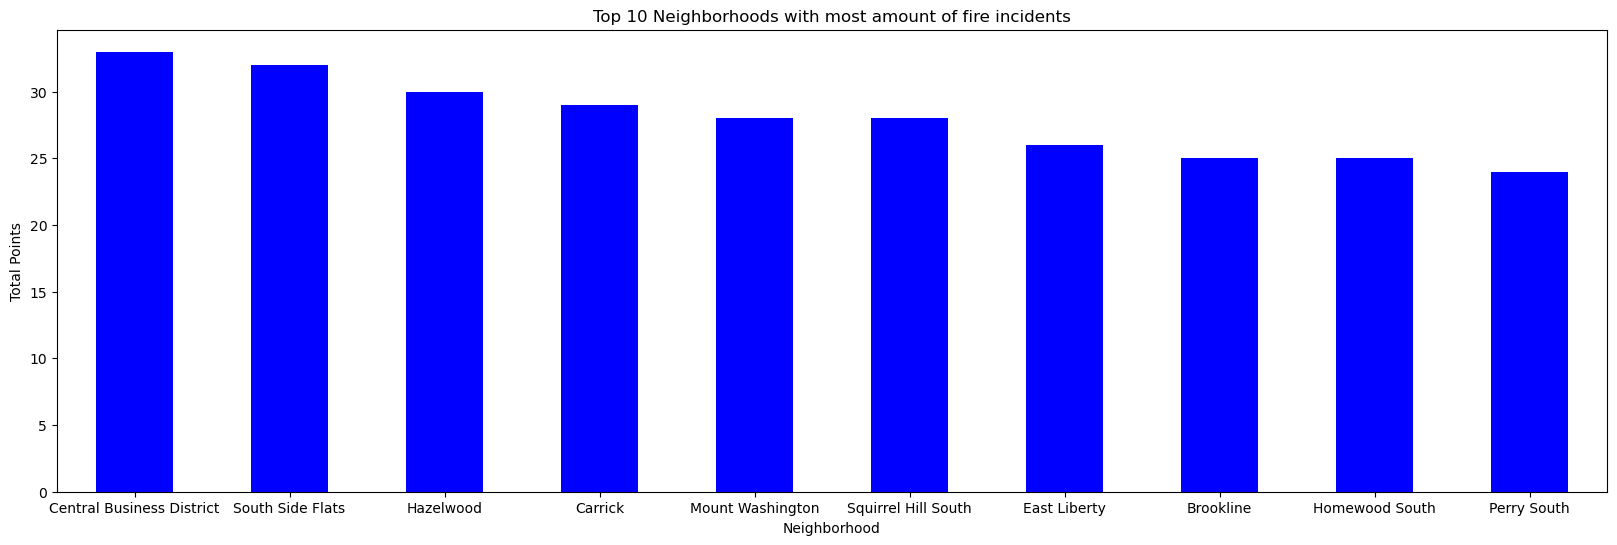

In [44]:
# now a simple bar graph to show top 10
top_10_fire = total_points[['neighborhood', 'points']].sort_values(by='points', ascending=False).head(10)

plt.figure(figsize=(20, 6))  # Set the figure size
top_10_fire.set_index('neighborhood')['points'].plot(kind='bar', color='blue', rot = 0)


plt.title('Top 10 Neighborhoods with most amount of fire incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Total Points')

plt.show()

<Axes: >

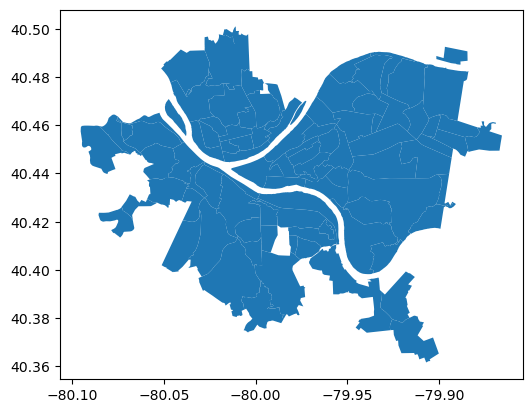

In [29]:
# now adding the map of all the neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


<Axes: >

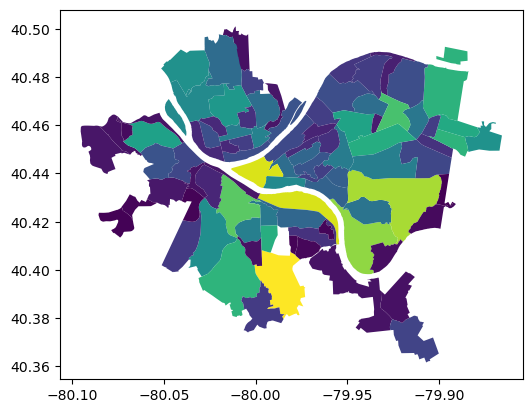

In [49]:
# do the merge
data = pd.read_csv("FireData.csv")

fire_count = data.groupby('neighborhood').size().reset_index(name = 'points')
fire_map = neighborhoods.merge(fire_count, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
fire_map[['hood','points','geometry']].head()

fire_map.plot(column='points')


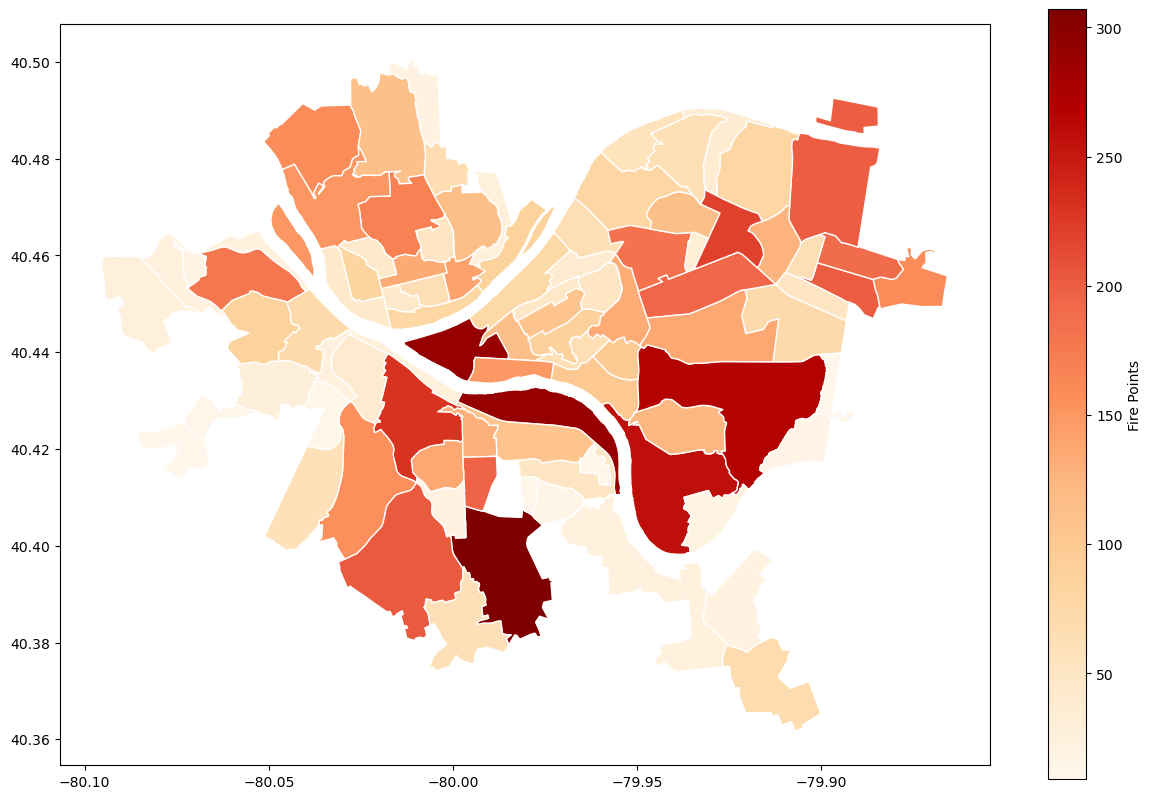

In [59]:
fire_map.plot(column='points', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Fire Points"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()